# Propagation Principles in Simple Graphs
We examine graphs that have small vertex-set (up to 20) and have a hub and spoke structure, meaning
they have few hubs and the rest of the vertices tend to be leaves. We first consider graphs with no cycles at all.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.stats import poisson
from tqdm import tqdm

import skimage as ski
from skimage import io

from skimage.transform import rescale, resize, downscale_local_mean

from scipy.special import rel_entr


# plt.ioff()
plt.ion()

################ Functions #######################################
from graphsfunctions import *


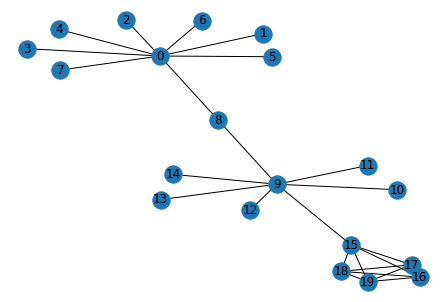

In [2]:
# Testing a little spider graph
G = nx.Graph()
G.add_nodes_from(range(20))
G.add_edges_from([(0, i) for i in range(1, 8)])
G.add_edge(0, 8)
G.add_edge(8, 9)
G.add_edges_from([(9, i) for i in range(10, 15)])
G.add_edge(15, 9)
G.add_edges_from([(i, j) for i in range(15, 19) for j in range(i + 1, 20)])
nx.draw(G, with_labels=True)
plt.show()

The "little Spider" contains a bigger star on 0, connected via 8 to a smaller star on 9, and a K5.
We want to explore its propagation properties.


100%|██████████| 20/20 [00:00<00:00, 470.01it/s]


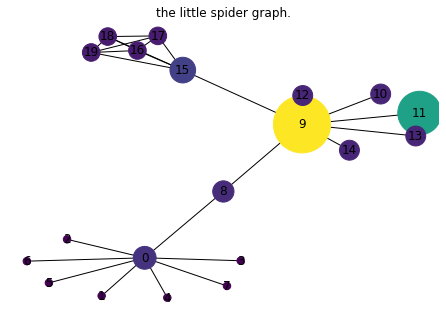

In [3]:
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W85[11], node_size=W85[11]*10000)
plt.title("the little spider graph.")
plt.show()


The plot shows, both by node size as well as by color code, the stationary propagation with biased concentrated on noe 11, with restart probability of 0.15.

100%|██████████| 20/20 [00:00<00:00, 395.19it/s]


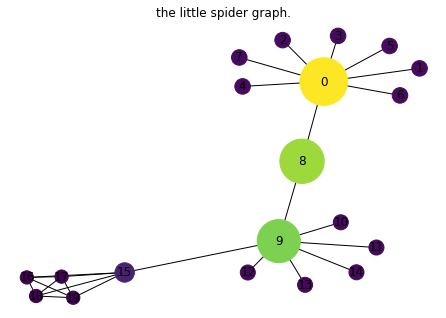

In [4]:
H, W = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W[8], node_size=W[8]*10000)
plt.title("the little spider graph.")
plt.show()


This is the same type of plot, but propagation from 8.

Now we are going top demonstrate how the propgation changes from each vertex, and with various alpha values, by way of heatmaps

100%|██████████| 20/20 [00:00<00:00, 881.66it/s]


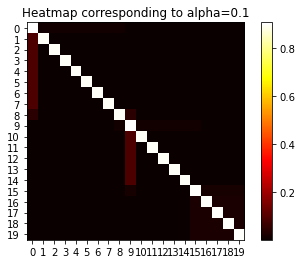

100%|██████████| 20/20 [00:00<00:00, 1297.06it/s]


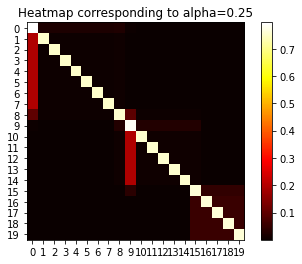

100%|██████████| 20/20 [00:00<00:00, 979.10it/s]


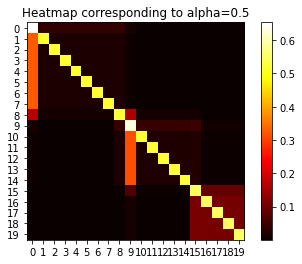

100%|██████████| 20/20 [00:00<00:00, 579.01it/s]


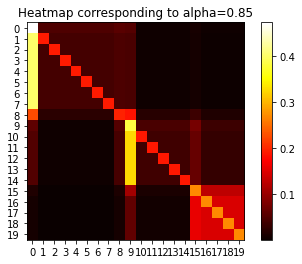

100%|██████████| 20/20 [00:00<00:00, 292.37it/s]


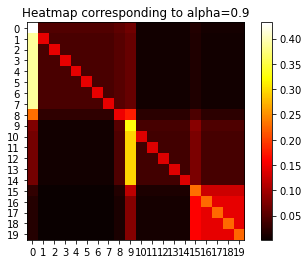

In [5]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.1)
heatmap(W10, "Heatmap corresponding to alpha=0.1")
plt.show()
plt.close()

H, W25 = pageRanksConcentratedBiasG(G, alpha=0.25)
heatmap(W25, "Heatmap corresponding to alpha=0.25")
plt.show()
plt.close()

H, W50 = pageRanksConcentratedBiasG(G, alpha=0.5)
heatmap(W50, "Heatmap corresponding to alpha=0.5")
plt.show()
plt.close()

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap corresponding to alpha=0.85")
plt.show()
plt.close()

H, W90 = pageRanksConcentratedBiasG(G, alpha=0.9)
heatmap(W90, "Heatmap corresponding to alpha=0.9")
plt.savefig("Heatmap Little Spider alpha=0.9.png")
plt.show()
plt.close()

Interestingly the alpha value doesn't seem to change the structure, but just the instensities. But this graph is very simple. We also note some trivial facts such that hubs retain more heat, and the leaves are cold. Because highly connected nodes receive heat from many sources. If we think in terms of random walk, they are more likely to be visited because they are connected to more nodes. Also notice that node 8 which connects 2 hot hubs is also interesting.

Now lets try the  smae trick with a different dog, I mean graph...

100%|██████████| 20/20 [00:00<00:00, 358.84it/s]


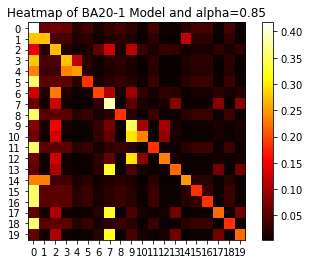

In [6]:
seed = 42
G = nx.barabasi_albert_graph(n=20, m=1, seed=seed)
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA20-1 Model and alpha=0.85")



100%|██████████| 20/20 [00:00<00:00, 599.88it/s]


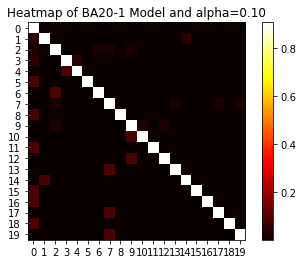

In [7]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA20-1 Model and alpha=0.10")


100%|██████████| 20/20 [00:00<00:00, 214.42it/s]


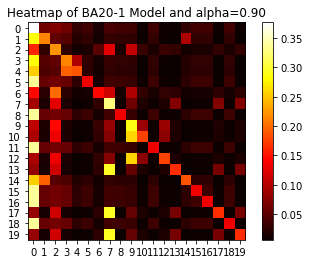

In [8]:
H, W90 = pageRanksConcentratedBiasG(G, alpha=0.90)
heatmap(W90, "Heatmap of BA20-1 Model and alpha=0.90")


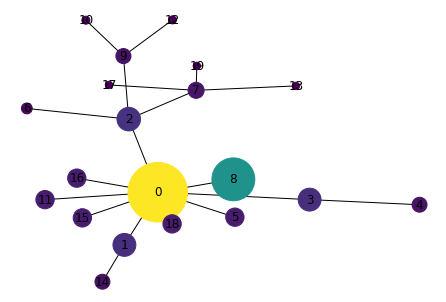

In [9]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*10000)


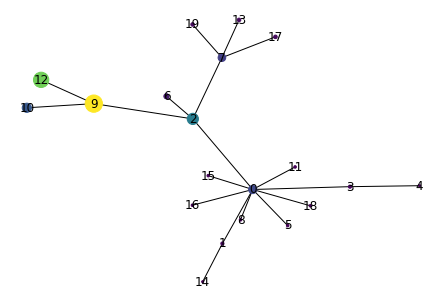

In [10]:
nx.draw(H, with_labels=True, node_color=W85[12], node_size=W85[12]*1000)


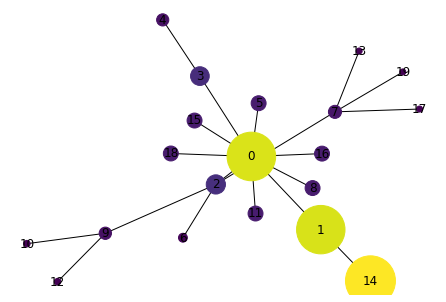

In [11]:
nx.draw(H, with_labels=True, node_color=W85[14], node_size=W85[14]*10000)


Now we do they same experiment with a more complex graph...

100%|██████████| 25/25 [00:00<00:00, 467.27it/s]


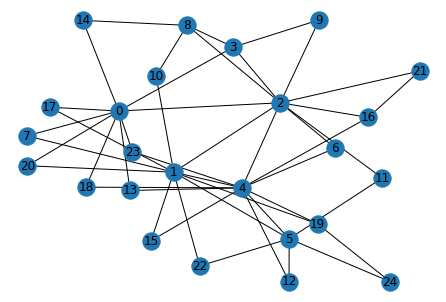

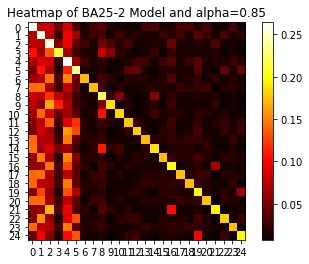

In [12]:
seed = 42
G = nx.barabasi_albert_graph(n=25, m=2, seed=seed)

nx.draw(G, with_labels=True)

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA25-2 Model and alpha=0.85")


100%|██████████| 25/25 [00:00<00:00, 1185.62it/s]


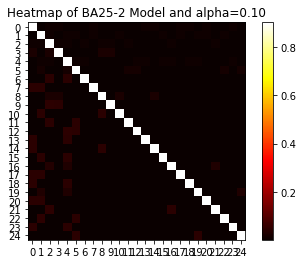

In [13]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA25-2 Model and alpha=0.10")


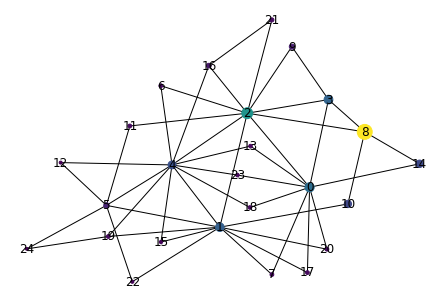

In [14]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*1000)


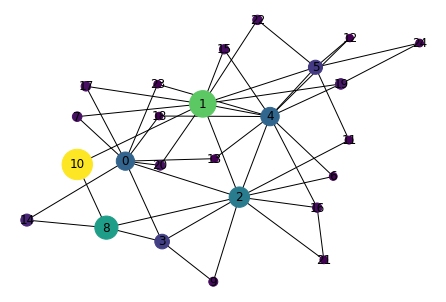

In [15]:
nx.draw(H, with_labels=True, node_color=W85[10], node_size=W85[10]*5000)


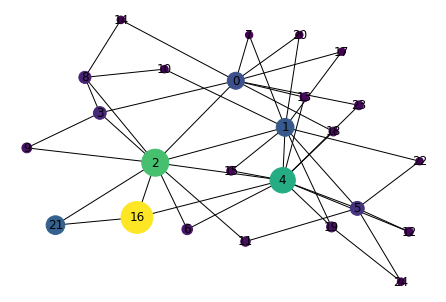

In [16]:
nx.draw(H, with_labels=True, node_color=W85[16], node_size=W85[16]*5000)


I think it is clear now  that propagation strongly depends on the distance from the propagating source and on the degree...

Next we are going to see what the influence graph looks like. The influence of node i on j is pi[j] where pi is the stationary distribution propagated from i (so we look at the j component of it).

The influence graph is a weighted graph on n nodes. where the edge weight of (i,j) is min(pi[j], pj[i]).
We also set a threshold $\delta$ so we only edges that weigh over delta make the cut.


100%|██████████| 25/25 [00:00<00:00, 554.50it/s]


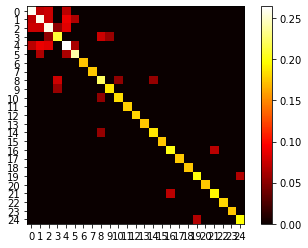

In [17]:
# reducedInfluenceMatrixG
W = reducedInfluenceMatrixG(G, delta=0.05)

heatmap(W, "")




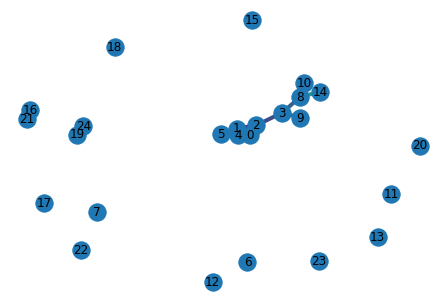

In [18]:
Gd = nx.Graph()
Gd.add_nodes_from(range(25))
edges = [(i,j) for i in range(25) for j in range(i,25) if W[i,j]>0]
Gd.add_edges_from(edges)
l = [W[e] for e in Gd.edges()]
l


nx.draw(Gd, with_labels=True, width=4, edge_color = range(40))
plt.show()

# Exploring graph clustering methods. 
Since we are dealing with propagation and interested in connected scale free
graphs such as Barabsi-Albert, I am trying to apply propagation to perform
this task. 
Idea 1: The hottest node is going to form the first cluster. We then extend it
by all nodes that are connected to it in a sufficiently hot path. Remove them
from the graph and repeat on the smaller graph. Thought should then be
dedicated to the matter of setting the parameters: what is 'hot' (delta), how
fast we propagate (alpha), how do we test statistical significance and
robustness. Define null model? Use connected edge swaps for robustness tests?


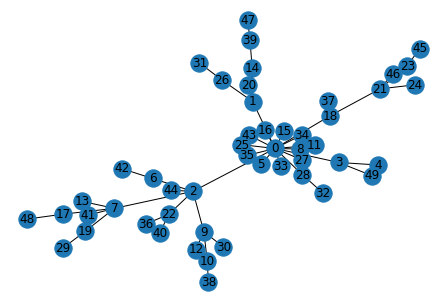

In [19]:
G = nx.barabasi_albert_graph(n=50, m=1, seed=seed)

nx.draw(G, with_labels=True)


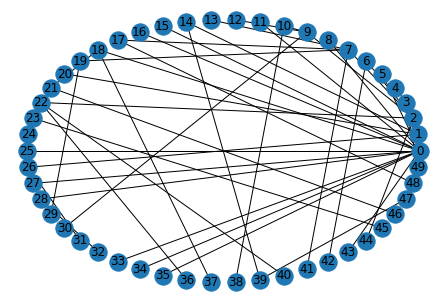

In [20]:
nx.draw_circular(G, with_labels=True)

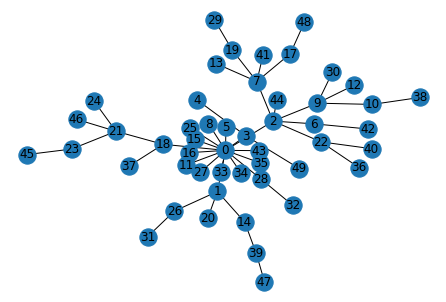

In [21]:
nx.draw_kamada_kawai(G, with_labels=True)

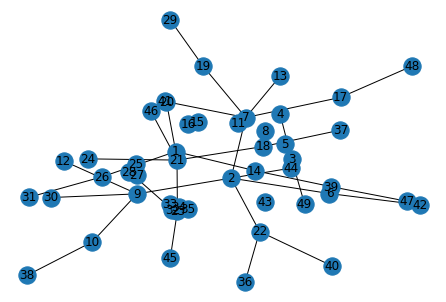

In [22]:
G.remove_node(0)

nx.draw_kamada_kawai(G, with_labels=True)

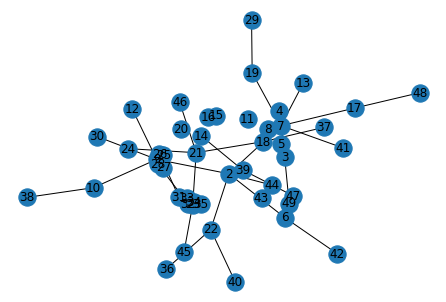

In [23]:
G.remove_node(1)

nx.draw_kamada_kawai(G, with_labels=True)

<BarContainer object of 50 artists>

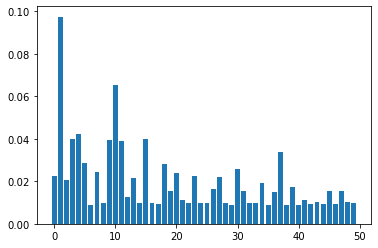

In [24]:
# trying to cluster a graph ...
G = nx.dual_barabasi_albert_graph(n=50, m1=1, m2=2, p=0.7, seed=seed)
H = G.copy()
p, _ = powerIterateG(G, alpha=0.85)
plt.bar(range(50), p)


100%|██████████| 50/50 [00:00<00:00, 529.32it/s]


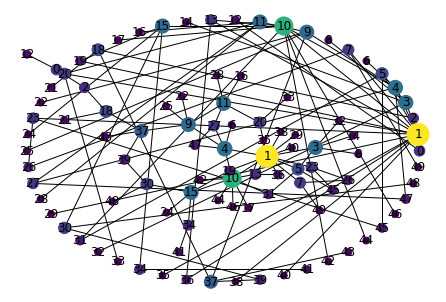

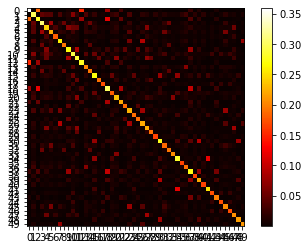

In [25]:
nx.draw_kamada_kawai(G, with_labels=True, node_color=p, node_size=5000*p)

nx.draw_circular(G, with_labels=True, node_color=p, node_size=5000*p)

s = np.argmax(p)
s

W = reducedInfluenceMatrixG(G, delta=0)
heatmap(W, "")


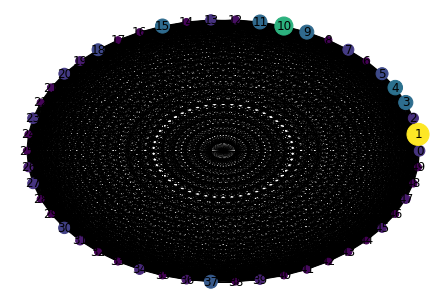

In [26]:
H = nx.Graph()
H.add_nodes_from(G.nodes())

edges = [(i,j) for i in range(49) for j in range(i+1,50) if W[i,j]>0]

H.add_edges_from(edges)

nx.draw_circular(H, with_labels=True, node_color=p, node_size=5000*p)




In [27]:
plt.show()

In [28]:
for delta in np.arange(0.01, 1, 0.01):
    remlist = [e for e in list(H.edges()) if W[e] <= delta]
    H.remove_edges_from(remlist)
    if nx.number_connected_components(H) > 1:
        print("break", len(H.edges()))
        break

len(H.edges())


break 120


120

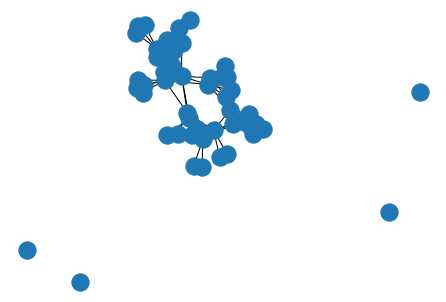

In [29]:
nx.draw(H)
plt.show()

In [30]:
# so that method is not very promicing because it tends to prune leaves and concerve one giant connected component

In [31]:
# We shall now try bottom up method. start from a totally disconnected graph. Pick the remaining coldest node and connect it to its nearest
# neighbor in the symmetric influence graph

29 29
34 35
36 38
37 40
6 6
16 17
36 42
37 44
38 46
15 16
25 28
19 22
21 25
20 24
25 33
7 8
12 14
22 32
31 49
27 43
29 48
16 21
25 41
10 12
21 36
24 47
19 31
22 45
13 19
15 26
19 39
17 34
2 2
9 13
13 27
0 0
11 23
10 20
4 7
9 30
8 18
3 5
7 37
5 11
3 9
4 15
1 3


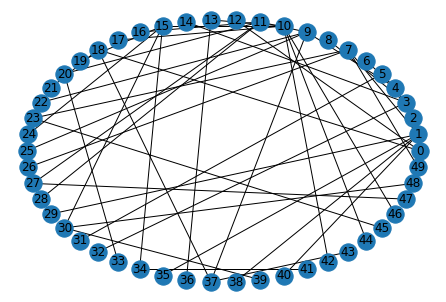

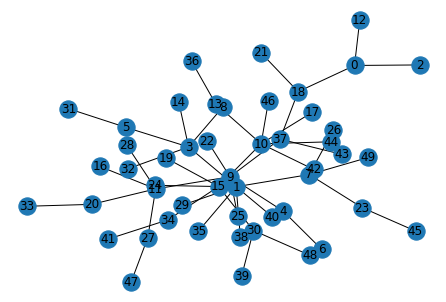

In [32]:
H = nx.Graph()
H.add_nodes_from(G.nodes())
nlist = list(H.nodes())
while nx.number_connected_components(H) > 3:
    s = np.argmin(p[nlist])
    x = nlist[s]
    print(s,x)
    nlist.pop(s)
    t = np.argmax([W[x,i] for i in nlist])
    H.add_edge(x,nlist[t])

nx.draw_circular(H, with_labels=True )
plt.show()

nx.number_connected_components(H)

nx.draw_kamada_kawai(H, with_labels=True)
plt.show()



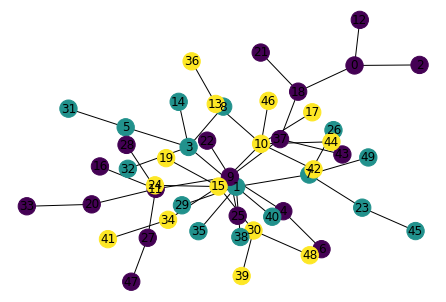

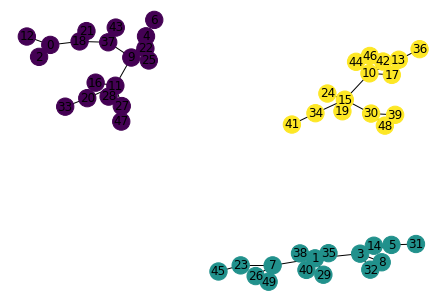

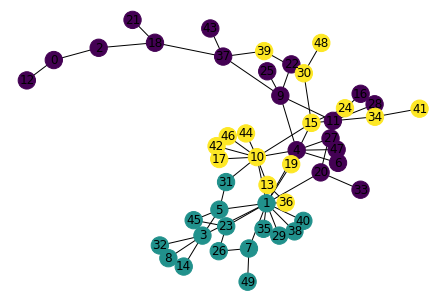

In [33]:
CCs = [list(c) for c in nx.connected_components(H)]

CCs

colors = np.zeros(50)
colors[CCs[1]]=1
colors[CCs[2]]=2


nx.draw_kamada_kawai(H, with_labels=True, node_color=colors)
plt.show()

nx.draw_spring(H, with_labels=True, node_color=colors)
plt.show()

nx.draw_spring(G, with_labels=True, node_color=colors)
plt.show()

In [34]:
# The 2 upper plots show the clustering on the influence matrix/graph the bottom one show the same clustering on the original graph

# Testing the clustering method on images
We are going to load a grayscale image, resize it to a compact size. Out of it we are going to create a graph as follows: if the image is an array $Y$ of size $n^2$,
then we create an array of $T$ size $n^4$. Each row of the bigger array represents a pixel of the image. Implicitly pixels are connected by an edge only if they are neighbors (on the horizontal or vertical, 
we exclude the diagonal for simplicity). So let $(i,j), (i+1,j)$ be neighboring pixels in $T$, then we set:
$T[i*n+j, i*(n+1)+j] = 1 / (1 + |y[i,j] - y[i+1,j]|)$ (and then make it symmetric etc...)
So the matrix $T$ represents the lattice graph with weighted esges.

We are then going to calculate the influence matrix of that implicit weighted graph, and cluster to $k$ clusters the pixels just as we did above. Then we recreate the image as follows:
We create a new $n^2$ array. The pixels that belong to a cluster, are all going to have the same value, which is the mean of those pixels on $Y$. 

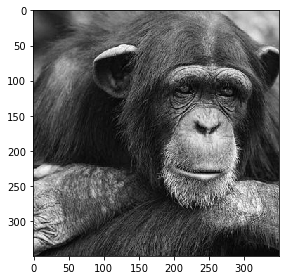

In [35]:
# now with a real image again
n=50
im = io.imread('chimp-665439.jpg', as_gray=True)
im.shape
x = ski.util.crop(im, ((0,0), (120,120))) 
x.shape

io.imshow(x)


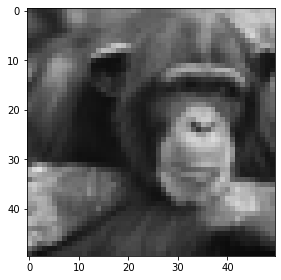

In [38]:
y = resize(x, (n,n))
z = y.flatten()
io.imshow(y)



In [39]:
T = np.zeros((n**2,n**2))

for i in range(n**2 - 1):
    if (i+1) % n > 0:
        r = i // n
        c = i % n
        T[i,i+1] = 1 / (1 + abs(
            y[r,c] - y[r,c+1]))
    if (i+n) < n**2:
        T[i,i+n] = 1 / (1 + abs(
            y[r,c] - y[r+1,c]))


In [40]:
T = T + np.transpose(T)
cc = bottomUpCluster(T, 560)


100%|██████████| 2500/2500 [13:48<00:00,  3.02it/s]


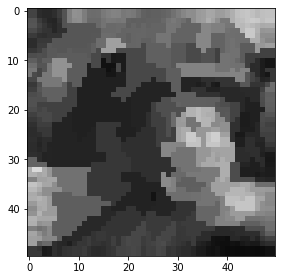

In [41]:
X = np.zeros(n*n)
for i in range(560):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))


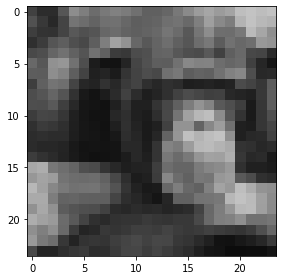

In [42]:
# for comparison, if we resize the image to 24x24 which is equivalent to partitioning it into
# 24x24 squares and taking the mean of each, it looks like this:
io.imshow(resize(y, (24,24)))

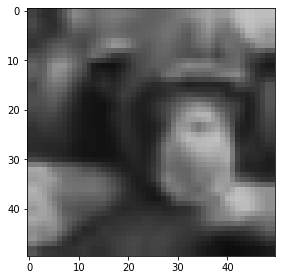

In [43]:
io.imshow(resize(resize(y, (24,24)), (50,50)))

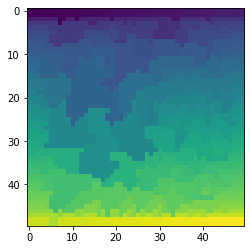

In [44]:
X = np.zeros(n*n)
for i in range(560):
    #X[cc[i]] = i
    X[cc[i]] = i

plt.imshow(X.reshape(n,n))

In [45]:
yy = np.zeros((n,n))
yy.shape

(50, 50)

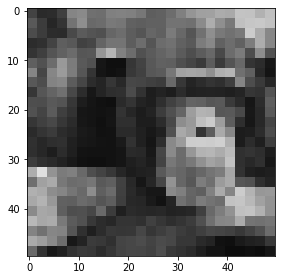

In [48]:
yy = np.zeros((n,n))

for i in range(0, n, 2):
    yy[i] = y[i]
    yy[i+1] = y[i]
for i in range(0, n, 2):
    yy[:,i+1] = yy[:,i]

io.imshow(yy)

#again creating a 50x50 where each square 


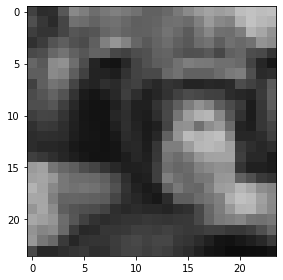

In [50]:
# more tests
n=24
y = resize(x, (n,n))
z = y.flatten()
io.imshow(y)


In [51]:
T = np.zeros((n**2,n**2))

for i in range(n**2 - 1):
    if (i+1) % n > 0:
        r = i // n
        c = i % n
        T[i,i+1] = 1 / (1 + abs(
            y[r,c] - y[r,c+1]))
    if (i+n) < n**2:
        T[i,i+n] = 1 / (1 + abs(
            y[r,c] - y[r+1,c]))


In [52]:
T = T + np.transpose(T)
cc = bottomUpCluster(T, 560)

100%|██████████| 576/576 [00:08<00:00, 71.01it/s]


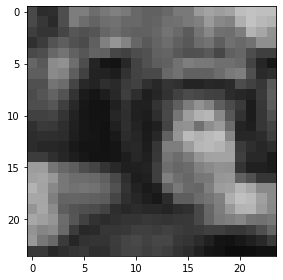

In [53]:
X = np.zeros(n*n)
for i in range(560):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))

100%|██████████| 576/576 [00:07<00:00, 73.81it/s]


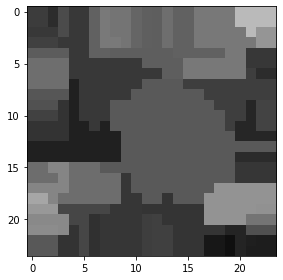

In [56]:
# trying to scale down the cluster number ever further
cc = bottomUpCluster(T, 56)

X = np.zeros(n*n)
for i in range(56):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))

100%|██████████| 576/576 [00:07<00:00, 76.35it/s]


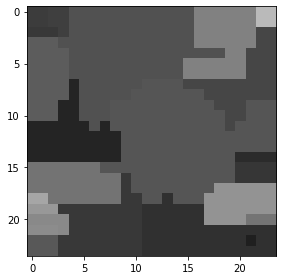

In [58]:
# trying to scale down the cluster number ever further
cc = bottomUpCluster(T, 24)

X = np.zeros(n*n)
for i in range(24):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))

100%|██████████| 576/576 [00:07<00:00, 72.42it/s]


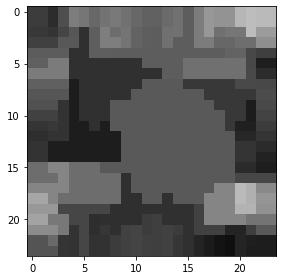

In [59]:

cc = bottomUpCluster(T, 128)

X = np.zeros(n*n)
for i in range(128):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))

100%|██████████| 576/576 [00:08<00:00, 71.18it/s]


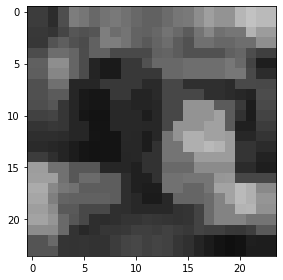

In [60]:
cc = bottomUpCluster(T, 256)

X = np.zeros(n*n)
for i in range(256):
    #X[cc[i]] = i
    X[cc[i]] = z[cc[i]].mean()

io.imshow(X.reshape(n,n))

# Karate Club
We are now going to try this clustering algorithm on the famous "Karate Club". We shall see how the close the clustering of the algorithm comes to the gound truth.


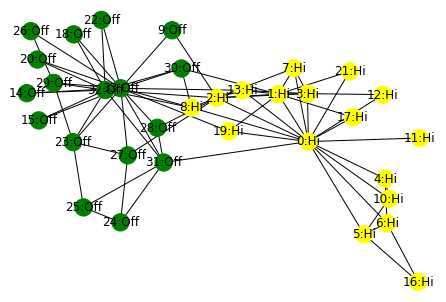

In [25]:
# Karate Club
G = nx.karate_club_graph()

colors = [0 if G.nodes[v]['club'] == 'Mr. Hi' else 1 for 
        v in G.nodes()]

colors = np.array(colors)

colors

colours = ['yellow' if x==0 else 'green' for x in colors]

clublabel = ['Hi' if i==0 else 'Off' for i in colors]

clublabel = [str(i) + ":" + clublabel[i] for i in G.nodes()]

clubdict = dict(zip(G.nodes(), clublabel))
clubdict

nx.draw_spring(G, with_labels=True, node_color=colours, labels=clubdict)


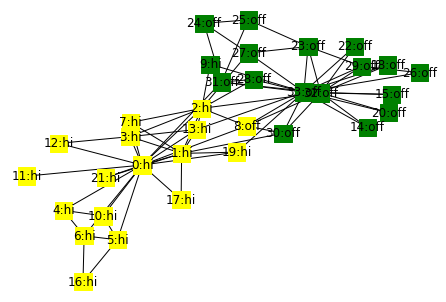

In [26]:
W = reducedInfluenceMatrixG(G, delta=0)

cc = bottomUpClusterG(G, W, 2)

clusters = np.zeros(len(W))

clusters[cc[1]]=1
clusters

clusters == colors
# so this algorithm got it mostly correct, with 2 errors.

W

#for i,j in G.edges:
#    G.edges[i,j]['weight'] = W[i,j]
#
#nx.draw_spring(G, with_labels=True, node_color=colors, k=30, labels=clubdict)

clusterlabel = ['hi' if i==0 else 'off' for i in clusters]

clusterlabel = [str(i) + ":" + clusterlabel[i] for i in G.nodes()]

clusterdict = dict(zip(G.nodes(), clusterlabel))

nx.draw_spring(G, with_labels=True, node_color=colours,
        node_shape='s', labels=clusterdict)


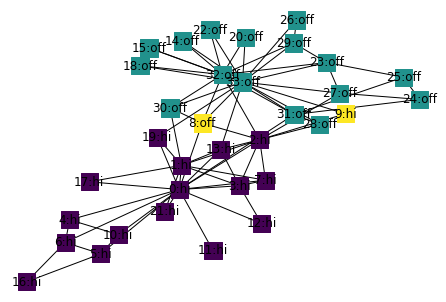

In [5]:
adjcolors = colors.copy()
adjcolors[colors != clusters] = 2

adjcolors
# labels show: node name and cluster according to the algorithm. Colors show the two groups in reality
# In case the cluster agrees with the ground truth. A third color indicates the exceptions
nx.draw_spring(G, with_labels=True, node_color=adjcolors, 
        node_shape='s', labels=clusterdict)


# New Idea: USe Propagation on the Edge-Graph for clusterin

New Clustering Algorithm: Starting from a Graph G, we construct its 'edge
graph' G' whose vertices are the edges of G and vertices are connected by an
edge in G' iff their corresponding edges share a vertex.
Edges that connect multiple groups probably have high degree of betweeness. In
the edge graph G' I predict that these nodes are going to be highly ranked.
Edges that connect members of the same group in G will be nodes of average
pagerank because they are sort of all the same as the other inter-group edges.
The idea: Create the edge graph and calculate its pagerank. Then from G the
edges that correspond to the hottest nodes until G is split into 2 components.
Then repeat the procedure on each component.
Stopping points can also be defined. In case the pagerank is close to uniform
we predict that there is no informative subdivision and stop the process.

Further motivation: There are 2 types of edges: edges that connect 2 nodes
within the same group, or edges that connect 2 nodes from 2 different groups,
so in short and ecge is either 'within' or 'between'. We are interested in
identifying the between edges. Remove them, and the graph is partitioned to
connected component. Propagation is computed for nodes on the graph rather
than its edges. If we move to the edge graph, the propagation of the nodes of
the edge graph is an assessment of the edges of the original graph. a between
edge is not necesarily hotter than a within edge. But perhaps the variance of
its influence is smaller than a within edge, because it has some influence on
multiple groups whereas a 'within' edge has most of its influence concetrated
within its own group. Hypothesis: If we take a 'between' edge, and look at the
induced subgraph of that edge and its neighbouring edges in the edge graph, in
a sprung layout it will look like an hourglass. If we take a 'within' edge,
the induced subgraph will resemble a clique.
Extra motivation for PPIN: An edge in the PPI represent an interaction, which
can either be internal 'within a function/complex' or transitional 'between
function/complex'. 



In [7]:
testG = G.copy()
eG = edgeGraphG(testG)
p,_ = powerIterateG(eG)

x = np.argmax(p)

eG.nodes[x]['edg']

y = tuple( eG.nodes[x]['edg'])

testG.remove_edge(*y)

nx.number_connected_components(testG)


1

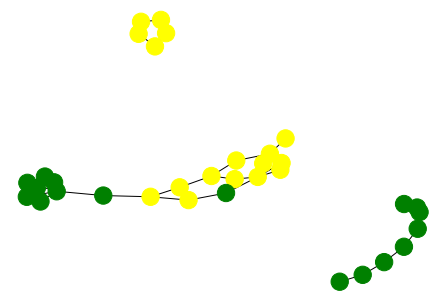

In [27]:
testG = G.copy()
eG = edgeGraphG(testG)
while nx.number_connected_components(testG) <= 3:
    p,_ = powerIterateG(eG)
    x = np.argmax(p)
    y = tuple( eG.nodes[x]['edg'])
    testG.remove_edge(*y)
    eG = edgeGraphG(testG)

nx.draw_spring(testG, node_color=colours)
# fail :(


array([23, 29])

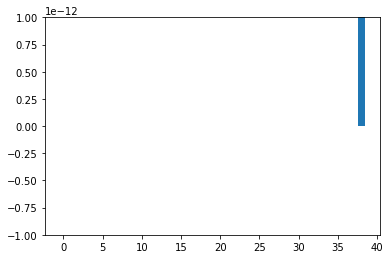

In [9]:
_ , w = pageRanksConcentratedBiasG(eG)

w[9].sum()

w.sum(axis=1)

w.min(axis = 1)

plt.bar(range(len(w)), w.min(axis=1))

x = np.argmax(w.min(axis=1))
eG.nodes[x]['edg']

x = np.argmax(w.var(axis=1))
eG.nodes[x]['edg']
# nope fail again :(


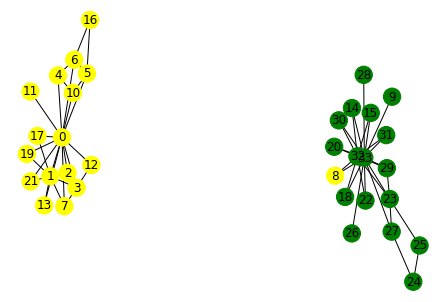

In [28]:
testG = G.copy()
eG = edgeGraphG(testG)
_ , w = pageRanksConcentratedBiasG(eG)
w.sum(axis=1)
w.sum(axis=0)
w[0].sum()
w[:,0].sum() #row sum to 1, col not

while nx.number_connected_components(testG) <= 1:
    _ , w = pageRanksConcentratedBiasG(eG)
    x = np.argmin(w.var(axis=1))
    eG.nodes[x]['edg']
    y = tuple( eG.nodes[x]['edg'])
    testG.remove_edge(*y)
    eG = edgeGraphG(testG)

    

nx.draw_spring(testG, node_color=colours, with_labels=True)




## What we did in above

We caomputed the influence matrix (non-symmetric, not reduced) of the edge-graph on G. For each row (axis=1) we calculate its variance.
We predict that  an edge in G that connects two clusters- its corresponding node in the edge-graph will have low variance because its influence extends to both groups. For a 'within' edge, its influence exends mostly within its own group. Well maybe its a coincidence but it worked for the karate club... The missed node, 8 is a person with interactions to both clubs so its not immediately clear why the person chose one club over the other. In fact node 8 has 8 interactions with 'Officer' vs 2 with 'Mr Hi" yet it belongs to 'Mr Hi'

In [22]:
print(G.nodes[8]['club'], list(G.neighbors(8)))
[G.nodes[x]['club'] for x in G.neighbors(8)]

Mr. Hi [0, 2, 30, 32, 33]


['Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Officer']

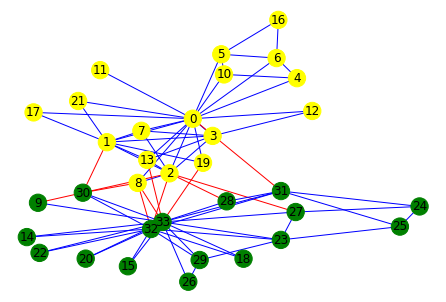

In [24]:
betweenEdges = [(u,v) for u,v in G.edges()
        if G.nodes[v]['club'] != G.nodes[u]['club']]

betweenEdges

EdgeColors = ['red' if G.nodes[v]['club'] != G.nodes[u]['club'] else 'blue' for
        u,v in G.edges()]

colours = ['yellow' if x==0 else 'green' for x in colors]

nx.draw_spring(G, node_color=colours, edge_color=EdgeColors, with_labels=True)


The Karate Club again. Edges in Red are the 'between' edges

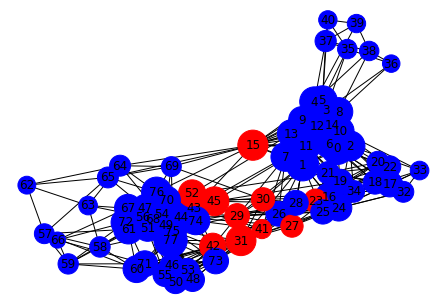

In [29]:
eG = edgeGraphG(G)
p,_ = powerIterateG(eG)
nx.draw_spring(eG, node_color=EdgeColors, with_labels=True, node_size=p*50000)



The edge graph of the Karate Club. The Between edges of G are the red nodes of the edge graph.

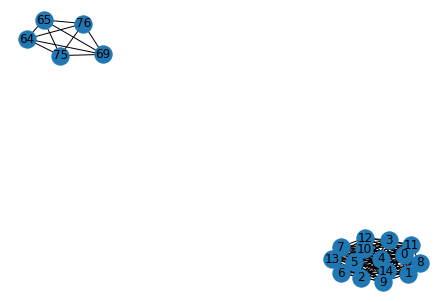

In [32]:
g = nx.subgraph(eG, eG.neighbors(15))
nx.draw_spring(g, with_labels=True)


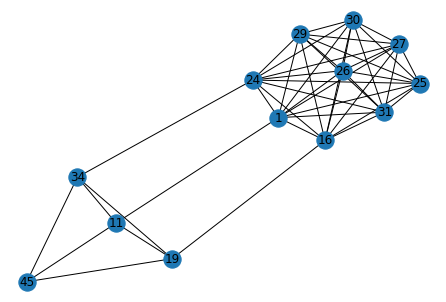

In [31]:

g = nx.subgraph(eG, eG.neighbors(28))
nx.draw_spring(g, with_labels=True)


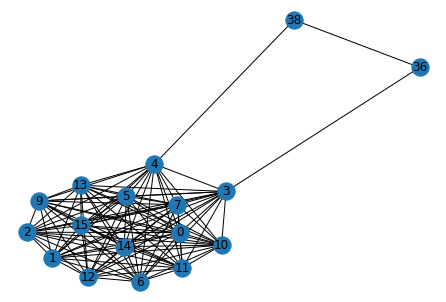

In [33]:
g = nx.subgraph(eG, eG.neighbors(8))
nx.draw_spring(g, with_labels=True)


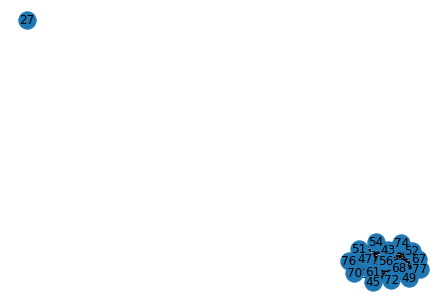

In [34]:
g = nx.subgraph(eG, eG.neighbors(44))
nx.draw_spring(g, with_labels=True)


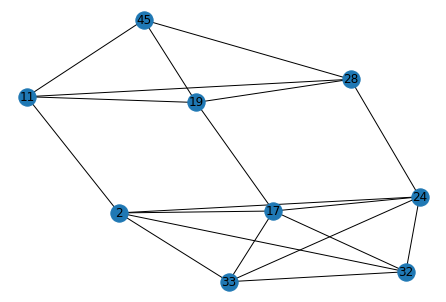

In [35]:
g = nx.subgraph(eG, eG.neighbors(34))
nx.draw_spring(g, with_labels=True)


In [36]:
y = list(eG.neighbors(34))
y.append(34)
y


[2, 11, 17, 19, 24, 28, 32, 33, 45, 34]

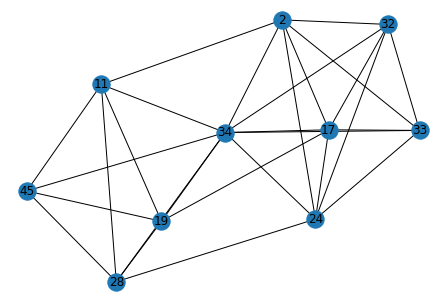

In [37]:
g = nx.subgraph(eG,y )
nx.draw_spring(g, with_labels=True)


when we consider between edges, in the edge graph, we expect (?) that their neighbors are divided
into 2 or more distinct groups. The neigbors of a within edge remain a single group
even when the with edge (as a node) is removed!
A graph cannot be further partition if in its edgegraph there are
no nodes whose neighbors form 2 or mored identifiable groups.


15 [ 0 31]
23 [ 1 30]
27 [2 9]
29 [ 2 27]
30 [ 2 28]
44 [ 9 33]
45 [13 33]
52 [19 33]
57 [23 25]
63 [24 27]


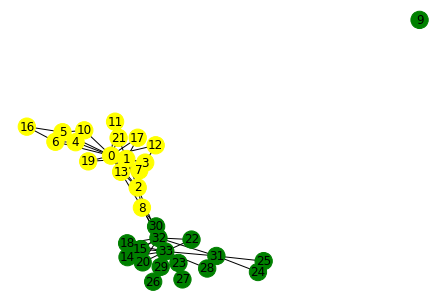

In [38]:
testG = G.copy()
eG = edgeGraphG(testG)
myList = eG.nodes()
for e in myList:
    g = nx.subgraph(eG, eG.neighbors(e))
    if nx.number_connected_components(g) > 1:
        print(e, eG.nodes[e]['edg'])
        testG.remove_edge(*eG.nodes[e]['edg'])

betweenEdges 

nx.draw_spring(testG, node_color=colours, with_labels=True)


<BarContainer object of 27 artists>

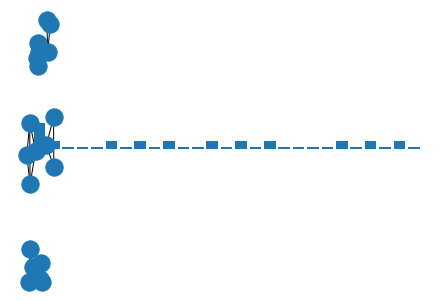

In [39]:
# We need a looser criterion to qualify a 'between' edge. Instead of require
# complete disconnection we need a measure of 'loosely connected' components.


foo = nx.Graph()
foo.add_nodes_from(range(5))

bar, _ = powerIterateG(foo)

foo.add_edges_from([(0,1),(0,2),(1,2),(3,4)])

bar, _ = powerIterateG(foo)

foo.add_node(5)
foo.add_edges_from([(3,5),(4,5)])
nx.draw_spring(foo)

foo.add_node(6)
foo.add_edges_from([(3,6),(4,6),(5,6)])
nx.draw_spring(foo)

foo.add_edge(2,3)
nx.draw_spring(foo)

bar, _ = powerIterateG(foo)
voo = 1/len(bar) * np.ones_like(bar)

rel_entr(bar,voo).sum()
rel_entr(voo,bar).sum()

_, w = pageRanksConcentratedBiasG(foo)


ag = np.array(nx.adj_matrix(g).todense())

w = pageRanksConcentratedBias(ag)

q = 1/len(w)
q

np.max(1/w * q)

(1/w * q).max(axis=1)

plt.bar(range(len(w)), w[0])


maybe discovered  0 [0 1]
maybe discovered  1 [0 2]
maybe discovered  2 [0 3]
maybe discovered  3 [0 4]
maybe discovered  4 [0 5]
maybe discovered  5 [0 6]
maybe discovered  6 [0 7]
maybe discovered  7 [0 8]
maybe discovered  8 [ 0 10]
maybe discovered  10 [ 0 12]
maybe discovered  11 [ 0 13]
maybe discovered  12 [ 0 17]
maybe discovered  13 [ 0 19]
maybe discovered  14 [ 0 21]
discovered  15 [ 0 31]
maybe discovered  16 [1 2]
maybe discovered  17 [1 3]
maybe discovered  18 [1 7]
maybe discovered  19 [ 1 13]
maybe discovered  20 [ 1 17]
maybe discovered  21 [ 1 19]
maybe discovered  22 [ 1 21]
discovered  23 [ 1 30]
maybe discovered  24 [2 3]
maybe discovered  25 [2 7]
maybe discovered  26 [2 8]
discovered  27 [2 9]
maybe discovered  28 [ 2 13]
discovered  29 [ 2 27]
discovered  30 [ 2 28]
maybe discovered  31 [ 2 32]
maybe discovered  33 [ 3 12]
maybe discovered  34 [ 3 13]
maybe discovered  35 [4 6]
maybe discovered  38 [ 5 10]
maybe discovered  39 [ 5 16]
maybe discovered  40 [ 6 16

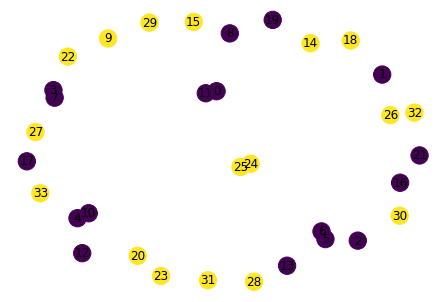

In [40]:
testG = G.copy()
eG = edgeGraphG(testG)
myList = eG.nodes()
for e in myList:
    g = nx.subgraph(eG, eG.neighbors(e))
    if nx.number_connected_components(g) > 1:
        print('discovered ', e, eG.nodes[e]['edg'])
        testG.remove_edge(*eG.nodes[e]['edg'])
    else:
        ag = np.array(nx.adj_matrix(g).todense())
        w = pageRanksConcentratedBias(ag)
        q = 1/len(w)
        if np.max(1/w * q) > 2.5:
            print('maybe discovered ', e, eG.nodes[e]['edg'])
            testG.remove_edge(*eG.nodes[e]['edg'])

        


betweenEdges 

nx.draw_spring(testG, node_color=colors, with_labels=True)


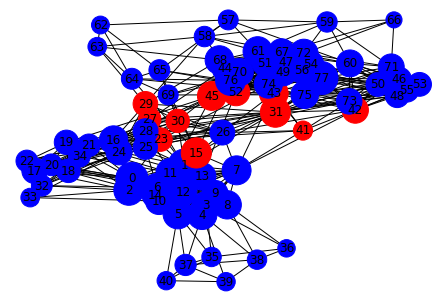

In [41]:
pos = nx.spring_layout(g)


eG = edgeGraphG(G)
p,_ = powerIterateG(eG)
nx.draw_spring(eG, node_color=EdgeColors, with_labels=True, node_size=p*50000)


77 [32 33]
1 [0 2]
0 [0 1]
74 [31 33]
29 [ 2 32]
0 [0 3]
12 [ 0 31]
56 [23 33]
40 [13 33]
1 [0 5]
1 [0 6]
10 [1 2]
35 [ 8 33]
57 [27 33]
63 [31 32]
60 [29 33]
50 [23 32]
6 [ 0 13]
59 [30 33]
2 [0 8]
15 [2 3]
1 [0 7]
7 [1 3]
0 [0 4]
0 [ 0 10]


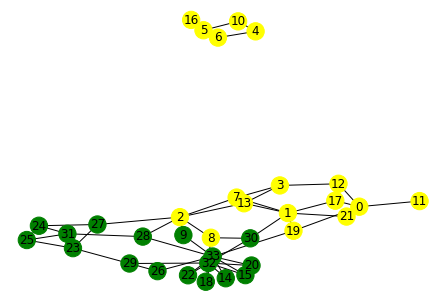

In [44]:
testG = G.copy()
eG = edgeGraphG(testG)
myList = eG.nodes()
while nx.number_connected_components(testG) == 1:
    p,_ = powerIterateG(eG)
    e = np.argmax(p)
    print(e, eG.nodes[e]['edg'])
    testG.remove_edge(*eG.nodes[e]['edg'])
    eG = edgeGraphG(testG)

nx.draw_spring(testG, node_color=colours, with_labels=True)


15 [ 0 31]
25 [2 8]
1 [0 2]
14 [1 2]
41 [13 33]
21 [2 3]
21 [2 7]
22 [ 2 13]
44 [19 33]
6 [0 8]
19 [ 1 30]


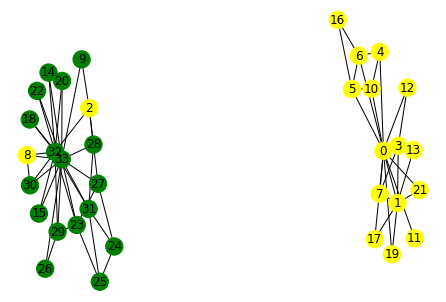

In [46]:
testG = G.copy()
eG = edgeGraphG(testG)
myList = eG.nodes()
while nx.number_connected_components(testG) == 1:
    _, w = pageRanksConcentratedBiasG(eG)
    #w =reducedInfluenceMatrixG(eG)
    e = w.min(axis=0).argmax()
    print(e, eG.nodes[e]['edg'])
    testG.remove_edge(*eG.nodes[e]['edg'])
    eG = edgeGraphG(testG)

nx.draw_spring(testG, node_color=colours, with_labels=True)


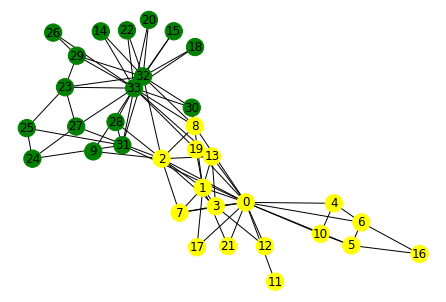

In [47]:
nx.draw_spring(G, node_color=colours, with_labels=True)


Above, we again created. This time we identified the edge whose minimal influence is maximal and removed it. Repeat until the Graph is disconnected. The resulting subdivision fails on nodes 8 and 2 which are indeed border nodes and hard to call where they belong.

0


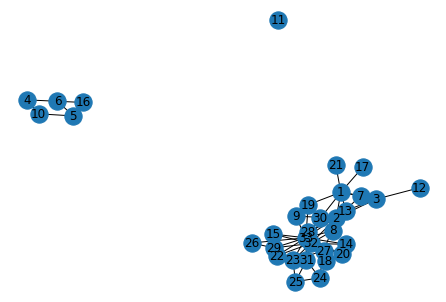

In [49]:
w =reducedInfluenceMatrixG(eG)
_, w = pageRanksConcentratedBiasG(eG)

testG = G.copy()
eG = edgeGraphG(testG)
myList = eG.nodes()
while nx.number_connected_components(testG) == 1:
    _, w = pageRanksConcentratedBiasG(testG)
    #w =reducedInfluenceMatrixG(eG)
    x = w.min(axis=0).argmax()
    print(x)
    testG.remove_node(x)

nx.draw_spring(testG, with_labels=True)


When a try a similar method but on the graph G rather than the 